In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# #Dividing data into train, valid and test dirs
# os.chdir('data')
# if os.path.isdir('train/mo') is False:
#     os.makedirs('train/mo')
#     os.makedirs('train/nomo')
#     os.makedirs('test/mo')
#     os.makedirs('test/nomo')
#     os.makedirs('valid/mo')
#     os.makedirs('valid/nomo')
    
#     for i in random.sample(glob.glob('mo*'), 750):
#         shutil.move(i, 'train/mo')
#     for i in random.sample(glob.glob('nomo*'), 750):
#         shutil.move(i, 'train/nomo')
#     for i in random.sample(glob.glob('mo*'), 200):
#         shutil.move(i, 'valid/mo')
#     for i in random.sample(glob.glob('nomo*'), 200):
#         shutil.move(i, 'valid/nomo')
#     for i in random.sample(glob.glob('mo*'), 75):
#         shutil.move(i, 'test/mo')
#     for i in random.sample(glob.glob('nomo*'), 75):
#         shutil.move(i, 'test/nomo')

In [3]:
# os.chdir('../../../')

In [4]:
train_path = '/Users/sagunmalwatkar/mo_vs_nomo/data/train'
test_path = '/Users/sagunmalwatkar/mo_vs_nomo/data/test'
valid_path = '/Users/sagunmalwatkar/mo_vs_nomo/data/valid'

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

train_batches = datagen.flow_from_directory(directory=train_path, target_size=(224,224), classes=['mo', 'nomo'], batch_size=20)
test_batches = datagen.flow_from_directory(directory=test_path, target_size=(224,224), classes=['mo', 'nomo'], batch_size=20, shuffle=False)
valid_batches = datagen.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['mo', 'nomo'], batch_size=20)

Found 1500 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
#function from the Tensorflow documentation that plots the processed images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

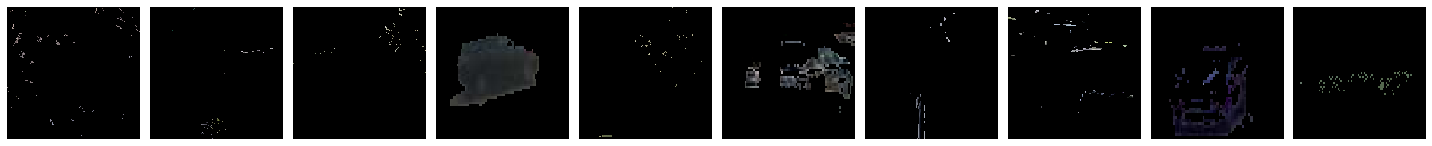

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [ ]:
vgg16

In [9]:
model = Sequential()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, 
          validation_steps=len(valid_batches), epochs=10, verbose=2)

Train for 75 steps, validate for 20 steps
Epoch 1/10
75/75 - 83s - loss: 0.4684 - accuracy: 0.7980 - val_loss: 0.3357 - val_accuracy: 0.8975
Epoch 2/10
75/75 - 78s - loss: 0.3409 - accuracy: 0.8847 - val_loss: 0.3094 - val_accuracy: 0.8900
Epoch 3/10
75/75 - 78s - loss: 0.3074 - accuracy: 0.8940 - val_loss: 0.3018 - val_accuracy: 0.8975
Epoch 4/10
75/75 - 77s - loss: 0.2743 - accuracy: 0.8947 - val_loss: 0.3196 - val_accuracy: 0.8975
Epoch 5/10
75/75 - 75s - loss: 0.2423 - accuracy: 0.9107 - val_loss: 0.3289 - val_accuracy: 0.8850
Epoch 6/10
75/75 - 75s - loss: 0.2126 - accuracy: 0.9287 - val_loss: 0.3293 - val_accuracy: 0.8975
Epoch 7/10
75/75 - 75s - loss: 0.1692 - accuracy: 0.9420 - val_loss: 0.3156 - val_accuracy: 0.8975
Epoch 8/10
75/75 - 75s - loss: 0.1404 - accuracy: 0.9613 - val_loss: 0.3130 - val_accuracy: 0.9000
Epoch 9/10
75/75 - 76s - loss: 0.1157 - accuracy: 0.9693 - val_loss: 0.3631 - val_accuracy: 0.8925
Epoch 10/10
75/75 - 83s - loss: 0.1090 - accuracy: 0.9733 - val_los

In [13]:
test_imgs, test_labels = next(test_batches)

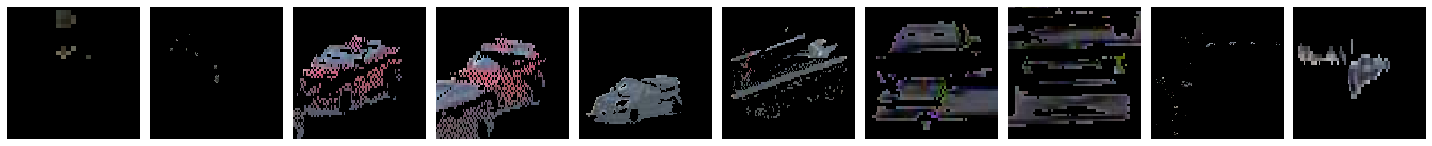

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
plotImages(test_imgs)
print(test_labels)

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [17]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [18]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
# function from scikit-learn documentation that plots the matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
test_batches.class_indices

{'mo': 0, 'nomo': 1}

Confusion matrix, without normalization
[[64 11]
 [ 6 69]]


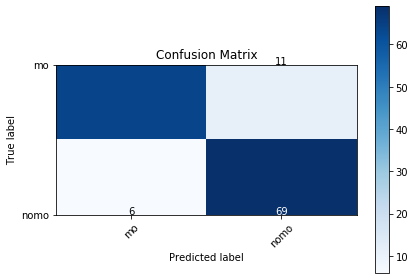

In [21]:
cm_plot_labels = ['mo', 'nomo']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [22]:
model.save('/Users/sagunmalwatkar/mo_vs_nomo/cnn-practice-1.h5')

In [23]:
img1 = keras.preprocessing.image.load_img(
    "/Users/sagunmalwatkar/mo_vs_nomo/data/mo-0-00d9d3c6-4cda-4e8c-ab9f-1273afff67fe_10_frame.jpg.bmp", target_size=(224,224)
)
img_array1 = keras.preprocessing.image.img_to_array(img)
img_array1 = tf.expand_dims(img_array1, 0)  # Create batch axis

predictions1 = model.predict(img_array1)
print(predictions1)
score1 = predictions1[0]
print(score1)
print(
    "This image is %.2f percent mo and %.2f percent nomo."
    % (100 * (1 - score1[1]), 100 * score1[1])
)


img2 = keras.preprocessing.image.load_img(
    "/Users/sagunmalwatkar/mo_vs_nomo/data/train/nomo/nomo-427-02846713-9a09-4fbb-8b2b-171bd7a5c035_6_frame.jpg.bmp", target_size=(224,224)
)
img_array2 = keras.preprocessing.image.img_to_array(img)
img_array2 = tf.expand_dims(img_array2, 0)  # Create batch axis

predictions2 = model.predict(img_array2)
print(predictions2)
score2 = predictions2[0]
print(score2)
print(
    "This image is %.2f percent mo and %.2f percent nomo."
    % (100 * (1 - score2[1]), 100 * score2[1])
)

NameError: name 'img' is not defined